```sh
py -3.10 -m venv ./.venv
.\.venv\Scripts\activate
python -m pip install --upgrade pip
pip install numpy pandas matplotlib seaborn jupyterlab  notebook voila tensorflow tensorflow-datasets scikit-learn
jupyter-lab
```

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2964 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1434 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1067 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0900 - accuracy: 0.9725
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0762 - accuracy: 0.9761


[0.07619906216859818, 0.9761000275611877]

In [9]:
print(tf.__version__)

2.11.0


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
len(y_train)

60000

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

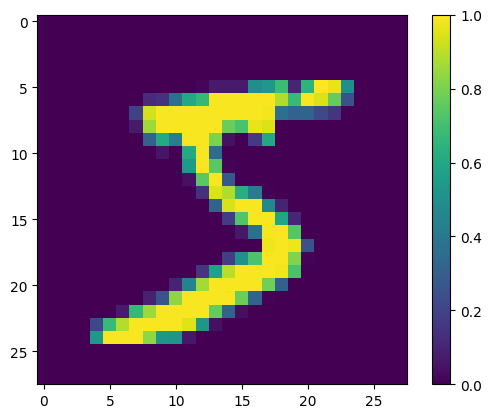

In [14]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']


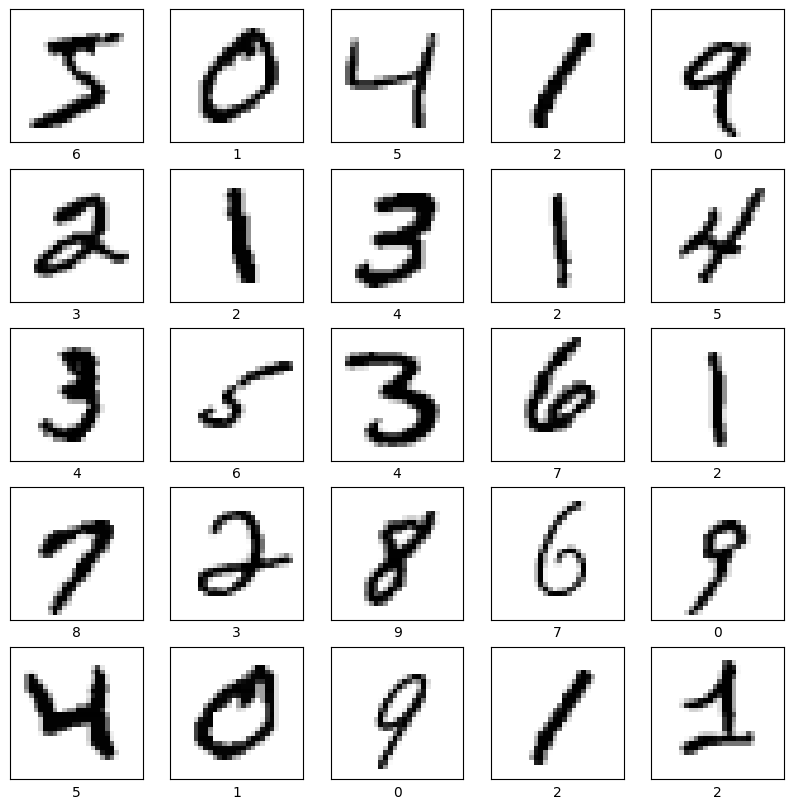

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [18]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
  tf.config.experimental.set_memory_growth(device, True)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
models_dir = r'./models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [22]:
model.save(models_dir + '/mnist_model')

INFO:tensorflow:Assets written to: ./models/mnist_model\assets


INFO:tensorflow:Assets written to: ./models/mnist_model\assets


(Tensorflow guide)[https://www.tensorflow.org/guide/data]

In [23]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

In [24]:
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [25]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [26]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [27]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [28]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [29]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [31]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [32]:
graph = tf.Graph()